In [54]:
import psycopg2
import psycopg2.extras
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
import tabulate
from IPython.display import display, HTML
from pandas.plotting import table 
from matplotlib.pyplot import figure
import functools

In [55]:
connection = psycopg2.connect(
    database="postgres",
    user="postgres",
    password="password",
    host="127.0.0.1",
    port="5432"
)
db = connection.cursor(cursor_factory=psycopg2.extras.RealDictCursor)

In [56]:
def getAll(query):
    db.execute(query)
    return pd.DataFrame(data=db.fetchall())

In [57]:
print("tweety z największą ilością pozytywnych komentarzy")
sql = """
select t.reply_count as "ilość komentarzy", t."content" as "treść", date(t.created_at) as "data", u."name" as "nazwa usera"
from tweet t
join tweet c on c.reply_to = t.id
join "user" u on t.user_id = u.id 
where 
	t.sentiment_compound >= 0.05 
	and t.reply_count > 100
	and t."type" = 1
	and c."type" = 2
group by t.id, u.id
order by t.reply_count desc
limit 10;
"""
pd.set_option('display.max_colwidth', 150)
df = getAll(sql)
display(df)
pd.set_option('display.max_colwidth', 50)

tweety z największą ilością pozytywnych komentarzy


,ilość komentarzy,treść,data,nazwa usera
0,63334,"I’ve decided to “identify” as Chinese. Coke will like me, Delta will agree with my “values” and I’ll probably get shoes from Nike &amp; tickets to...",2021-04-03,Gov. Mike Huckabee
1,46960,CASES!!!!! OMG CASES!!!!! THERE ARE CASES!!! MORE CASES!!!! CASES ARE GOING UP!!!!!!!! CASESESESESESES!!!! CASES WENT UP!!!!! OMG!!!!!! THERES...,2020-12-04,Rep. Anthony Sabatini
2,34356,Close your eyes and manifest #cashappfriday blessings https://t.co/c4zAHBWrwL,2021-04-09,Cash App
3,33903,Pres. Trump is fighting for YOU! Here are some of his priorities for a 2nd term:\n\n*Establish Permanent Manned Presence on The Moon\n*Send the 1s...,2020-10-23,GOP
4,27787,"How many of those who urged our govt to help liberate the Iraqis, Syrians, Kurds, Afghanis, etc., are as committed now to liberating Virginia, Min...",2020-04-17,Laura Ingraham
5,26248,"These vaccine passports segregate people and strip them of their freedom to travel internationally. Vaccinations are important, and I encourage ev...",2021-04-05,Dr. Drew
6,24835,What motivated you to get vaccinated?,2021-04-27,Douglas Emhoff
7,17343,MY HEART MAY BE MADE OF PLASTIC BUT TODAY I’M GIVING AWAY SOME PAPER WITH ! DROP YOUR CASH APP BELOW &amp; #PLASTICHEARTS FOR BLACK FRIDAY $$$ h...,2020-11-27,Miley Ray Cyrus
8,14219,This election is too important to not do everything we possibly can.,2020-09-28,Dr. Jill Biden
9,13412,"If folks want to wear a mask, they are free to do so. Those who don’t want to wear a mask shouldn’t be shamed into it, and govt should not mandate...",2020-10-22,Governor Kristi Noem


In [58]:
print("tweety z największą ilością negatywnych komentarzy")
sql = """
select t.reply_count, t."content", date(t.created_at), u."name" 
from tweet t
join tweet c on c.reply_to = t.id
join "user" u on t.user_id = u.id 
where 
	t.sentiment_compound <= -0.05 
	and t.reply_count > 100
	and t."type" = 1
	and c."type" = 2
group by t.id, u.id
order by t.reply_count desc
limit 10;
"""
pd.set_option('display.max_colwidth', 150)
df = getAll(sql)
display(df)
pd.set_option('display.max_colwidth', 50)

tweety z największą ilością negatywnych komentarzy


,reply_count,content,date,name
0,45680,"In Joe Biden’s America your job is illegal, you are locked in your home, borders don’t exist, MS-13 lives next door and the police aren’t coming w...",2020-06-29,Matt Gaetz
1,28287,"Spanish Flu. West Nile Virus. Zika. Ebola. All named for places.\n\nBefore the media’s fake outrage, even CNN called it “Chinese Coronavirus.”\n \...",2020-03-18,The White House 45 Archived
2,23864,"Due to the rise in #COVID19 cases, CA is issuing a limited Stay at Home Order.\n\nNon-essential work and gatherings must stop from 10pm-5am in cou...",2020-11-19,Gavin Newsom
3,21758,"We, the NFL, condemn racism and the systematic oppression of Black People. We, the NFL, admit we were wrong for not listening to NFL players earli...",2020-06-05,NFL
4,20313,"👉Her husband is dead &amp; she's in the ICU after ingesting chloroquine:\n\n""We saw Trump on TV -- every channel -- &amp; all of his buddies and t...",2020-03-23,Heidi Przybyla
5,17451,"We have received 25,000 complaints of reopening violations.\n\nBars or restaurants that violate the law can lose their liquor license.\n\nPeople w...",2020-06-14,Andrew Cuomo
6,16862,"Tucker Carlson warned his viewers last night that if Biden is elected, everything Trump has done to this country will be reversed! 🤷🏻‍♂️",2020-08-12,William LeGate (ig: @legate)
7,16443,Karen wore a mask for 45 minutes and now she's crying because she can't see strangers' faces or hold their babies.\nhttps://t.co/AYE0N5Xtxo,2020-05-20,Brian Tyler Cohen
8,15841,I would tell you how many followers I have lost but I have no idea how many i had before because I’m an adult,2021-01-10,Jake Tapper
9,12440,Words have consequences. \n\nIt’s called the coronavirus.\n\nFull stop.,2021-03-19,President Biden


In [59]:
def plot_sentiment(xs, ys, xlabel, ylabel, tittle, file_name, step=1, color="blue"):
    plt.figure(figsize=(12, 10))
    plt.grid(linestyle='-', linewidth=1)
    plt.plot(xs, ys, linestyle='--')
    plt.scatter(xs, ys, c=ys)
    plt.colorbar()
    plt.clim(-1, 1)
    plt.ylim((-0.2, 0.2))
    plt.ylabel(ylabel, size=14)
    plt.xlabel(xlabel, size=14)
    plt.title(tittle, size=16)
    ax = plt.gca()
    plt.xticks(xs, rotation=60)
    ax.set_xticks(xs[::step])
    plt.savefig(f'mleko/{file_name}.png')
    plt.show()

def plot(xs, ys, xlabel, ylabel, tittle, file_name, step=1, color="blue"):
    plt.figure(figsize=(12, 10))
    plt.grid(linestyle='-', linewidth=1)
    plt.plot(xs, ys, linestyle='--')
    plt.scatter(xs, ys)
    # plt.ylim(0)
    plt.ylabel(ylabel, size=14)
    plt.xlabel(xlabel, size=14)
    plt.title(tittle, size=16)
    ax = plt.gca()
    plt.xticks(xs, rotation=60)
    ax.set_xticks(xs[::step])
    plt.savefig(f'mleko/{file_name}.png')
    plt.show()

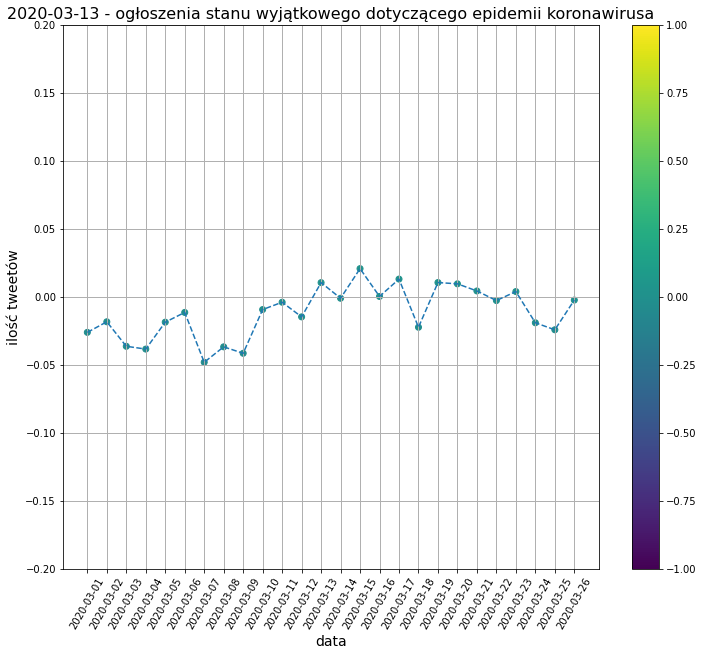

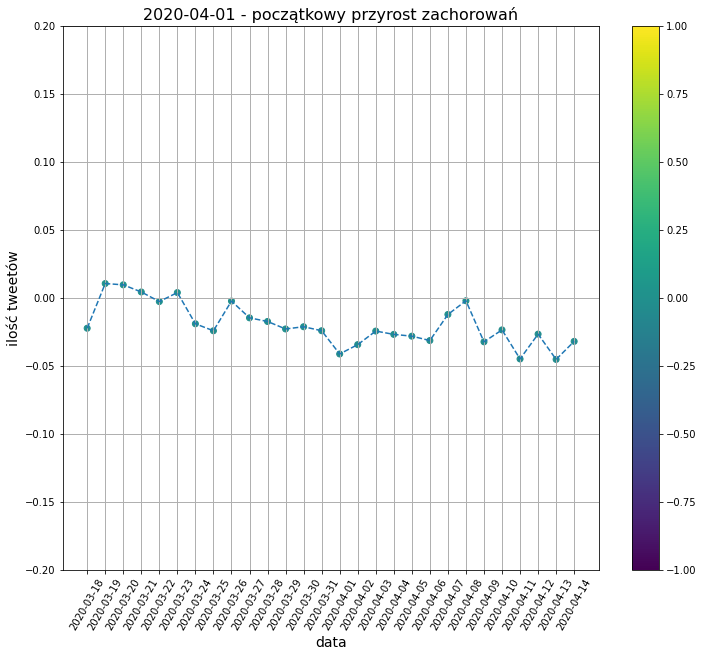

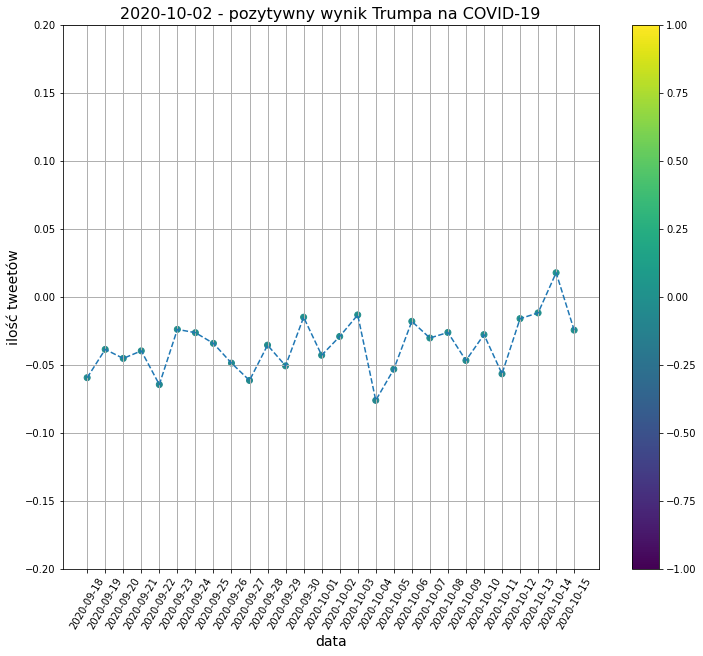

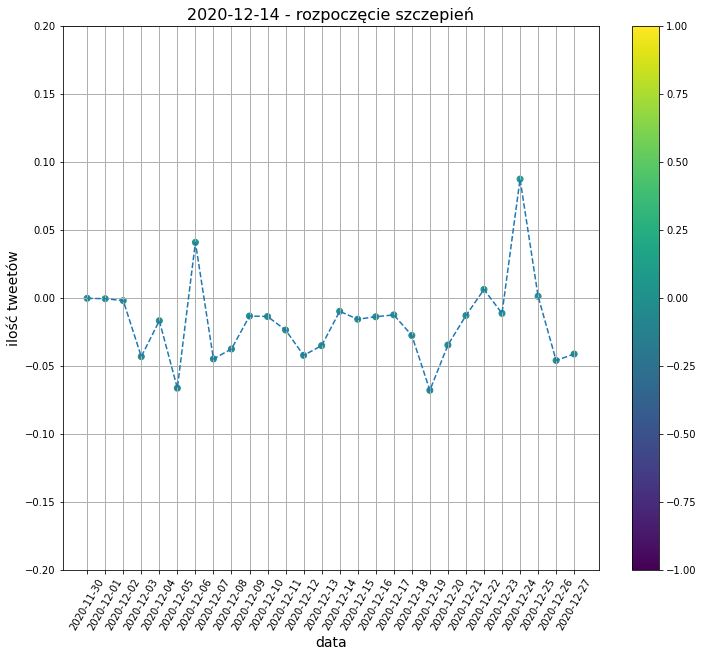

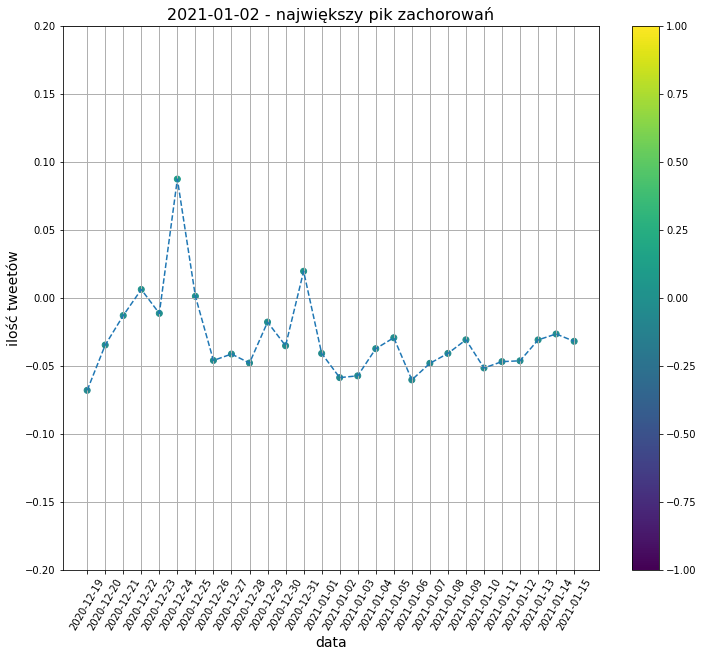

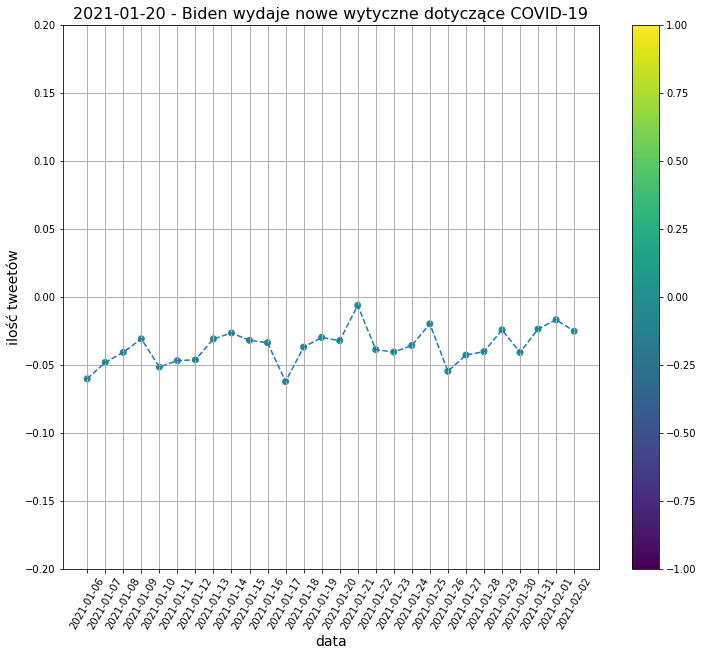

In [60]:
events = [
	('2020-03-13', 'ogłoszenia stanu wyjątkowego dotyczącego epidemii koronawirusa'),
	('2020-04-01', 'początkowy przyrost zachorowań'),
	('2020-10-02', 'pozytywny wynik Trumpa na COVID-19'),
	('2020-12-14', 'rozpoczęcie szczepień'),
	('2021-01-02', 'największy pik zachorowań'),
	('2021-01-20', 'Biden wydaje nowe wytyczne dotyczące COVID-19'),
]
for date_str, title in events:
	sql = f"""
	select date(t.created_at), count(t.id), avg(t.sentiment_compound) 
	from tweet t 
	where 
		t."type" = 1
		and t.created_at between date('{date_str}') - interval '14' day and date('{date_str}') + interval '14' day
	group by date(t.created_at);
	"""

	df = getAll(sql)
	plot_sentiment(df['date'], df['avg'], 'data', 'ilość tweetów', f'{date_str} - {title}', f'{date_str}_sentyment_tweetow', 1)



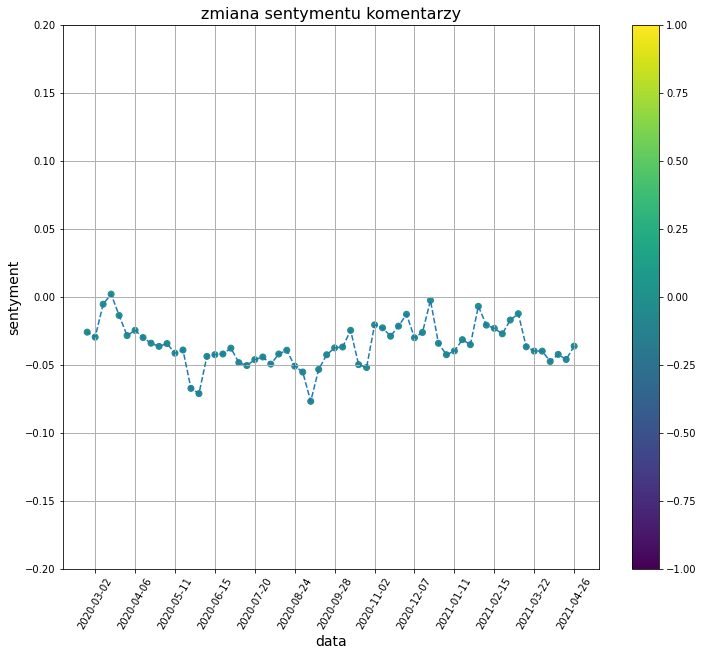

In [61]:
sql = """
select avg(t.sentiment_compound), date_trunc('week', t.created_at) as week
from tweet t
where t.type = 1
group by week
order by week desc;
"""

df = getAll(sql)
plot_sentiment(df['week'], df['avg'], 'data', 'sentyment', 'zmiana sentymentu komentarzy', 'zmiana_sentymentu_komentarzy', 5)


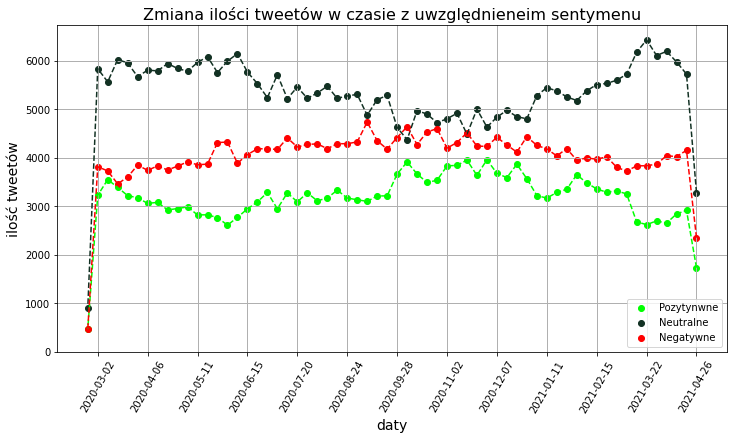

In [62]:
sql = """
select count(t.id), date_trunc('week', t.created_at) as week
from tweet t
where 
	t.type = 1
	and t.sentiment_compound >= 0.05
	-- and t.created_at between date('2020-03-01') and date('2020-06-01')
group by week
order by week desc;
"""
df1 = getAll(sql)
sql = """
select count(t.id), date_trunc('week', t.created_at) as week
from tweet t
where 
	t.type = 1
	and t.sentiment_compound < 0.05
	and t.sentiment_compound > -0.05
	-- and t.created_at between date('2020-03-01') and date('2020-06-01')
group by week
order by week desc;
"""
df2 = getAll(sql)
sql = """
select count(t.id), date_trunc('week', t.created_at) as week
from tweet t
where 
	t.type = 1
	and t.sentiment_compound <= -0.05
	-- and t.created_at between date('2020-03-01') and date('2020-06-01')
group by week
order by week desc;
"""
df3 = getAll(sql)

plt.figure(figsize=(12, 6))
plt.grid(linestyle='-', linewidth=1)

plt.plot(df1['week'], df1['count'], linestyle='--', color="#00ff00")
plt.scatter(df1['week'], df1['count'], color="#00ff00", label='Pozytynwne')

plt.plot(df2['week'], df2['count'], linestyle='--', color="#123123")
plt.scatter(df2['week'], df2['count'], color="#123123", label='Neutralne')

plt.plot(df3['week'], df3['count'], linestyle='--', color="#ff0000")
plt.scatter(df3['week'], df3['count'], color="#ff0000", label='Negatywne')

plt.legend()
plt.ylim(0)
plt.ylabel('ilość tweetów', size=14)
plt.xlabel('daty', size=14)
plt.title('Zmiana ilości tweetów w czasie z uwzględnieneim sentymenu', size=16)
ax = plt.gca()
plt.xticks(df1['week'], rotation=60)
ax.set_xticks(df1['week'][::5])
plt.savefig(f'mleko/Zmiana_ilości_tweetów_w_czasie_z_uwzględnieneim_sentymenu.png')
plt.show()


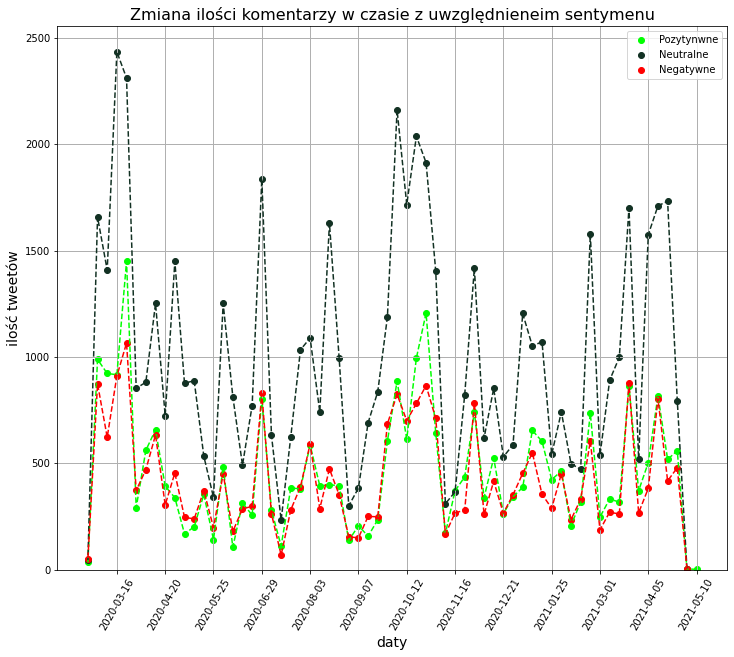

In [63]:
sql = """
select count(t.id), date_trunc('week', t.created_at) as week
from tweet t
where 
	t.type = 2
	and t.sentiment_compound >= 0.05
	-- and t.created_at between date('2020-03-01') and date('2020-06-01')
group by week
order by week desc;
"""
df1 = getAll(sql)
sql = """
select count(t.id), date_trunc('week', t.created_at) as week
from tweet t
where 
	t.type = 2
	and t.sentiment_compound < 0.05
	and t.sentiment_compound > -0.05
	-- and t.created_at between date('2020-03-01') and date('2020-06-01')
group by week
order by week desc;
"""
df2 = getAll(sql)
sql = """
select count(t.id), date_trunc('week', t.created_at) as week
from tweet t
where 
	t.type = 2
	and t.sentiment_compound <= -0.05
	-- and t.created_at between date('2020-03-01') and date('2020-06-01')
group by week
order by week desc;
"""
df3 = getAll(sql)

plt.figure(figsize=(12, 10))
plt.grid(linestyle='-', linewidth=1)

plt.plot(df1['week'], df1['count'], linestyle='--', color="#00ff00")
plt.scatter(df1['week'], df1['count'], color="#00ff00", label='Pozytynwne')

plt.plot(df2['week'], df2['count'], linestyle='--', color="#123123")
plt.scatter(df2['week'], df2['count'], color="#123123", label='Neutralne')

plt.plot(df3['week'], df3['count'], linestyle='--', color="#ff0000")
plt.scatter(df3['week'], df3['count'], color="#ff0000", label='Negatywne')

plt.legend()
plt.ylim(0)
plt.ylabel('ilość tweetów', size=14)
plt.xlabel('daty', size=14)
plt.title('Zmiana ilości komentarzy w czasie z uwzględnieneim sentymenu', size=16)
ax = plt.gca()
plt.xticks(df1['week'], rotation=60)
ax.set_xticks(df1['week'][::5])
plt.savefig(f'mleko/Zmiana_ilości_komentarzy_w_czasie_z_uwzględnieneim_sentymenu.png')
plt.show()


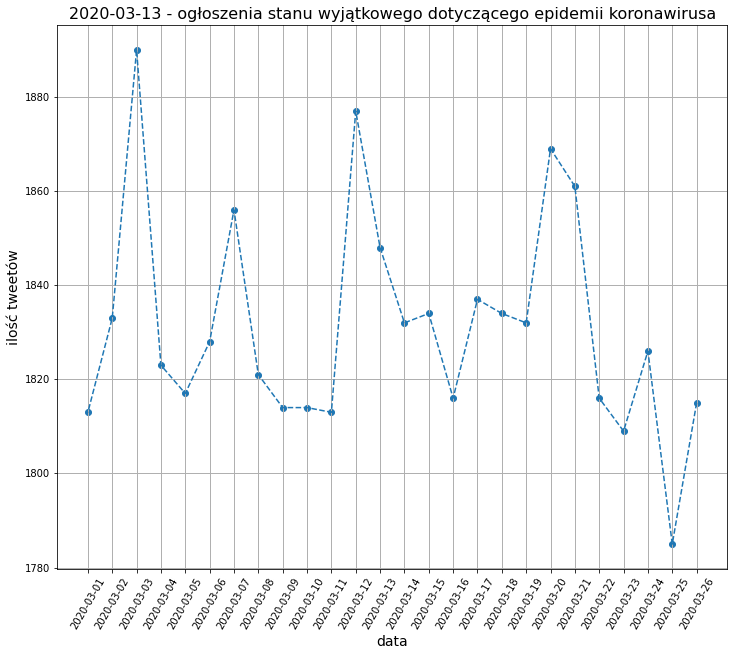

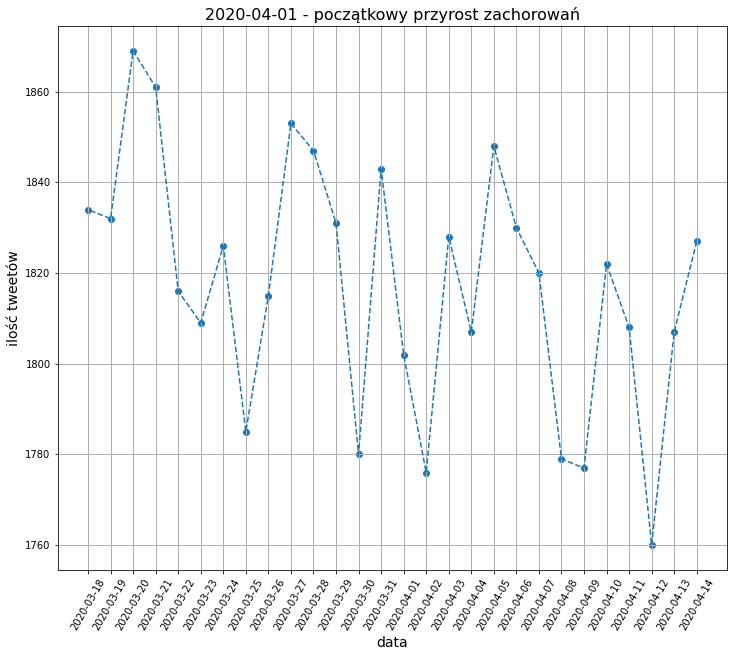

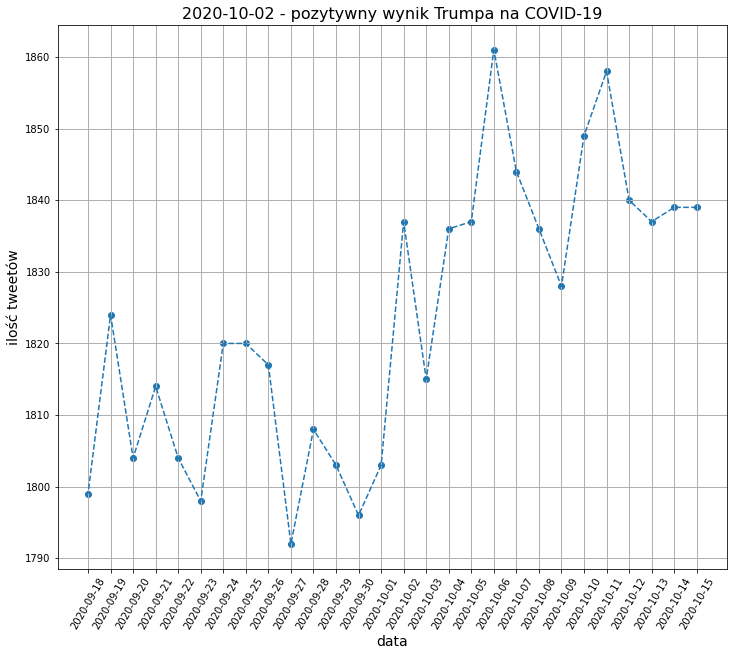

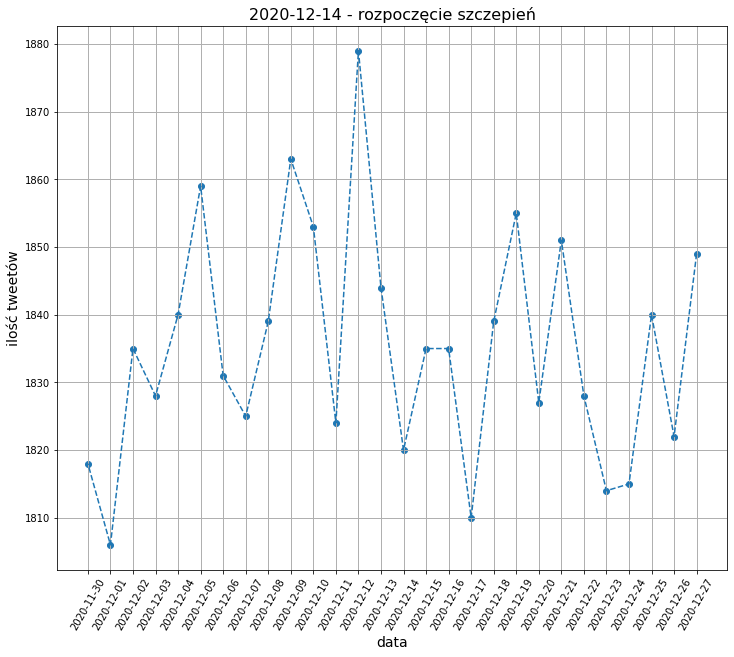

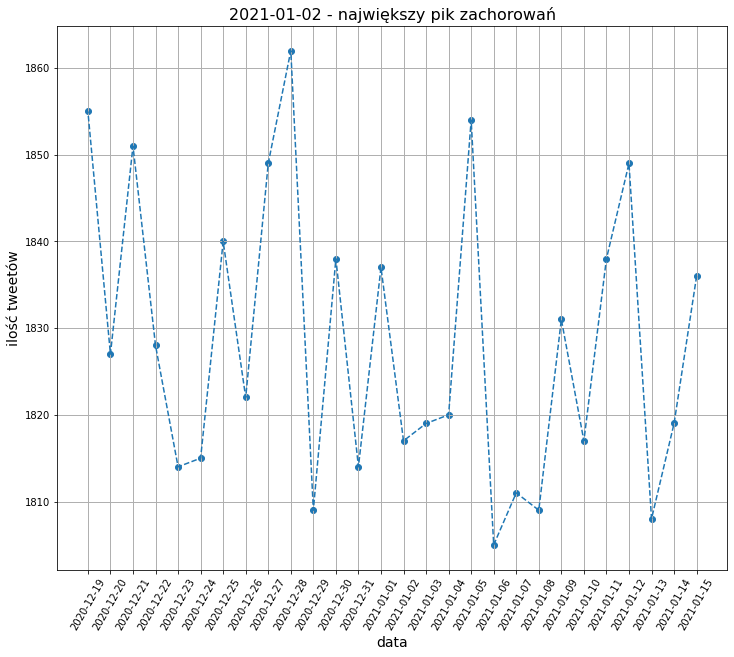

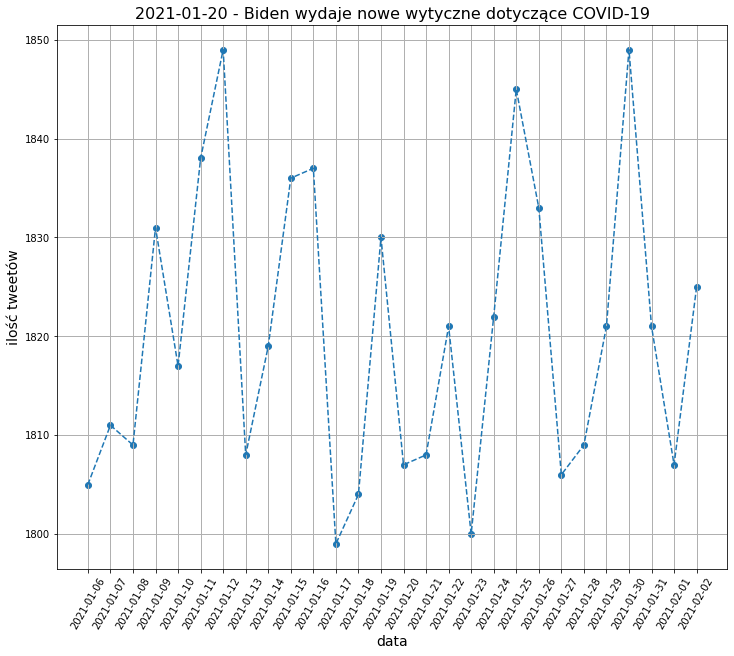

In [64]:
events = [
	('2020-03-13', 'ogłoszenia stanu wyjątkowego dotyczącego epidemii koronawirusa'),
	('2020-04-01', 'początkowy przyrost zachorowań'),
	('2020-10-02', 'pozytywny wynik Trumpa na COVID-19'),
	('2020-12-14', 'rozpoczęcie szczepień'),
	('2021-01-02', 'największy pik zachorowań'),
	('2021-01-20', 'Biden wydaje nowe wytyczne dotyczące COVID-19'),
]
for date_str, title in events:
	sql = f"""
	select count(t.id), date_trunc('day', t.created_at) as week
	from tweet t
	where 
		t.type = 1
		and t.created_at between date('{date_str}') - interval '14' day and date('{date_str}') + interval '14' day
	group by week
	order by week desc;
	"""

	df = getAll(sql)
	plot(df['week'], df['count'], 'data', 'ilość tweetów', f'{date_str} - {title}', f'{date_str}_ilosc_tweetow', 1)


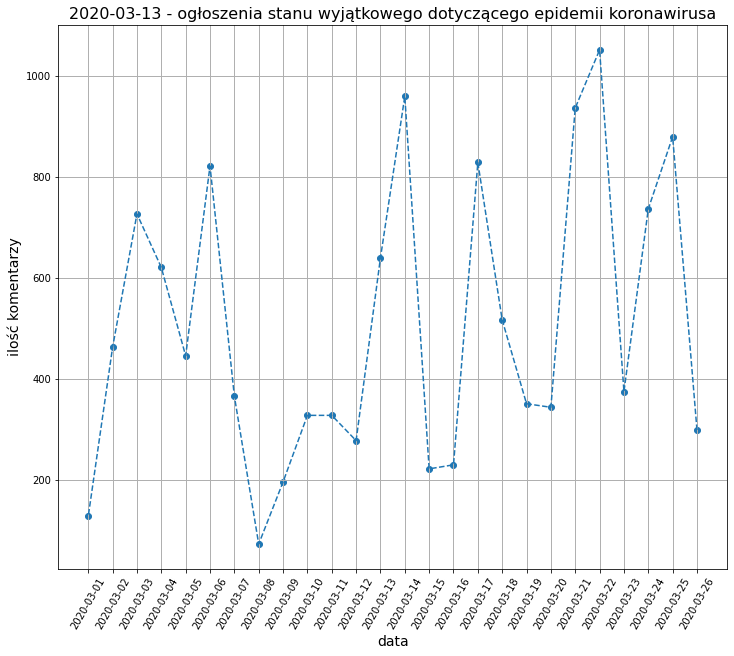

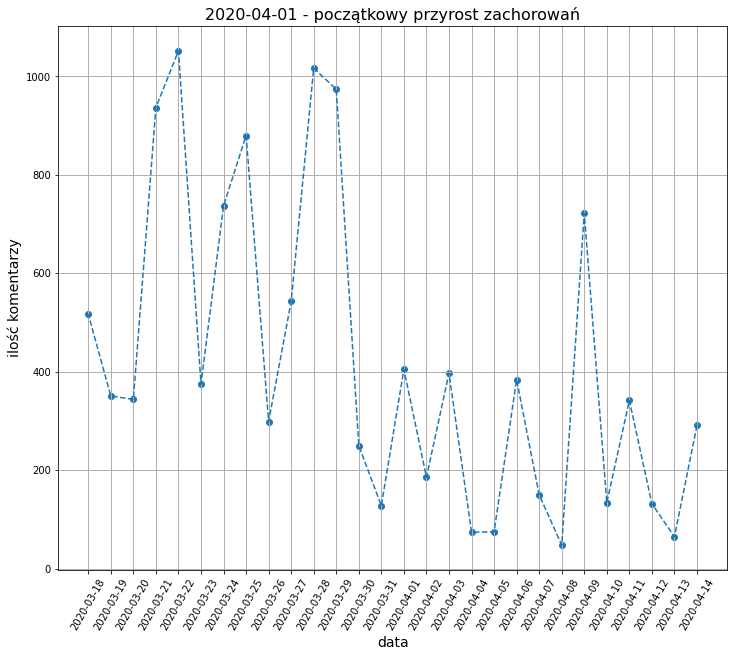

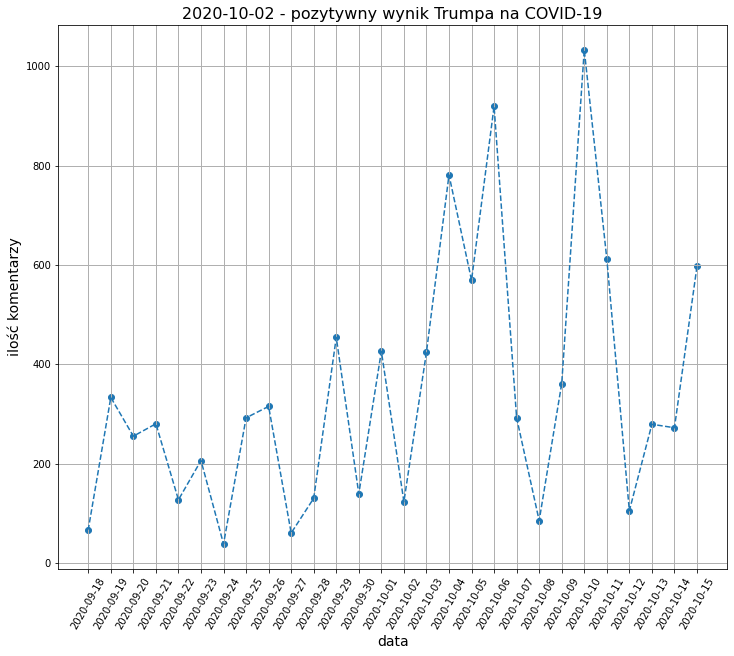

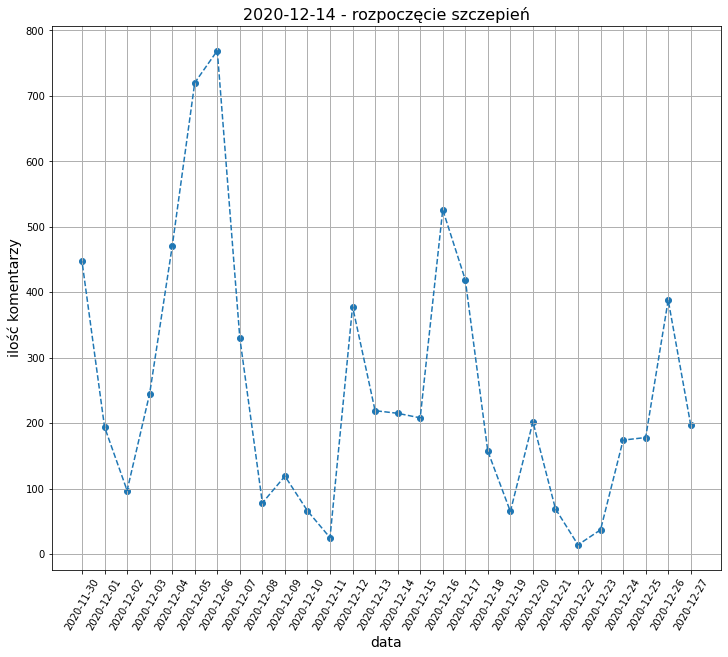

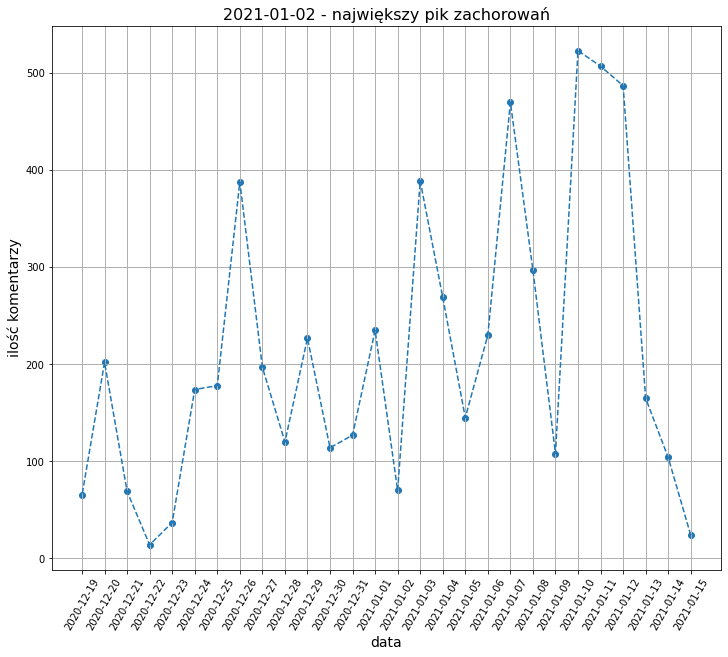

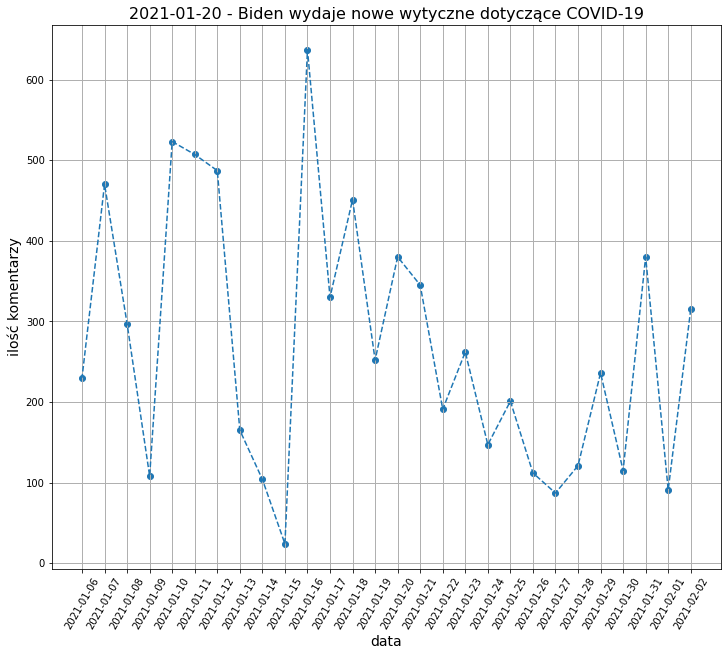

In [65]:
events = [
	('2020-03-13', 'ogłoszenia stanu wyjątkowego dotyczącego epidemii koronawirusa'),
	('2020-04-01', 'początkowy przyrost zachorowań'),
	('2020-10-02', 'pozytywny wynik Trumpa na COVID-19'),
	('2020-12-14', 'rozpoczęcie szczepień'),
	('2021-01-02', 'największy pik zachorowań'),
	('2021-01-20', 'Biden wydaje nowe wytyczne dotyczące COVID-19'),
]
for date_str, title in events:
	sql = f"""
	select count(t.id), date_trunc('day', t.created_at) as week
	from tweet t
	where 
		t.type = 2
		and t.created_at between date('{date_str}') - interval '14' day and date('{date_str}') + interval '14' day
	group by week
	order by week desc;
	"""

	df = getAll(sql)
	plot(df['week'], df['count'], 'data', 'ilość komentarzy', f'{date_str} - {title}', f'{date_str}_ilosc_komentarzy', 1)
